In [1]:
# For system stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Load the data
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,Ones,Twos,Threes,Fours,Fives,Sixes,Weighted?
0,0.128000,0.200000,0.128000,0.176000,0.192000,0.176000,False
1,0.220588,0.191176,0.191176,0.132353,0.176471,0.088235,False
2,0.173913,0.104348,0.113043,0.173913,0.278261,0.156522,True
3,0.136986,0.178082,0.136986,0.164384,0.191781,0.191781,False
4,0.123656,0.150538,0.139785,0.112903,0.166667,0.306452,True


In [3]:
# Using sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[['Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes']]
y = df['Weighted?']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Train a sequential model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, input_dim=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=0.01)

model.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics=['accuracy', Precision(), Recall()]
)
model.build(X.shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (100000, 128)             896       
                                                                 
 dropout_16 (Dropout)        (100000, 128)             0         
                                                                 
 dense_21 (Dense)            (100000, 256)             33024     
                                                                 
 dropout_17 (Dropout)        (100000, 256)             0         
                                                                 
 dense_22 (Dense)            (100000, 256)             65792     
                                                                 
 dropout_18 (Dropout)        (100000, 256)             0         
                                                                 
 dense_23 (Dense)            (100000, 64)             

c:\Users\whxia\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint("seqModel.h5", monitor="val_loss", verbos=1, save_best_only=True, mode="min") # Saves the model

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=10000,
    validation_split=0.2,
    callbacks=[mc]
)

Epoch 1/100
6/6 [==============================] - 3s 271ms/step - loss: 0.6609 - accuracy: 0.5923 - precision_3: 0.5763 - recall_3: 0.6702 - val_loss: 0.6551 - val_accuracy: 0.4912 - val_precision_3: 0.4912 - val_recall_3: 1.0000
Epoch 2/100
6/6 [==============================] - 1s 221ms/step - loss: 0.5120 - accuracy: 0.7233 - precision_3: 0.7037 - recall_3: 0.7632 - val_loss: 0.3014 - val_accuracy: 0.8944 - val_precision_3: 0.9893 - val_recall_3: 0.7937
Epoch 3/100
6/6 [==============================] - 1s 240ms/step - loss: 0.2656 - accuracy: 0.8988 - precision_3: 0.9296 - recall_3: 0.8610 - val_loss: 0.1784 - val_accuracy: 0.9332 - val_precision_3: 0.9705 - val_recall_3: 0.8911
Epoch 4/100
6/6 [==============================] - 1s 225ms/step - loss: 0.2045 - accuracy: 0.9255 - precision_3: 0.9332 - recall_3: 0.9153 - val_loss: 0.1541 - val_accuracy: 0.9416 - val_precision_3: 0.9286 - val_recall_3: 0.9546
Epoch 5/100
6/6 [==============================] - 1s 223ms/step - loss: 0.1

In [24]:
# Get metrics of the final model
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Accuracy: %f" % accuracy)
print("Loss: %f" % loss)
print("Precision: %f" % precision)
print("Recall: %f" % recall)

938/938 [==============================] - 2s 2ms/step - loss: 0.1209 - accuracy: 0.9536 - precision_3: 0.9597 - recall_3: 0.9465
Accuracy: 0.953600
Loss: 0.120898
Precision: 0.959728
Recall: 0.946487


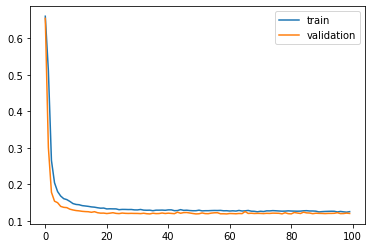

In [28]:
# Plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "validation"])
plt.show()

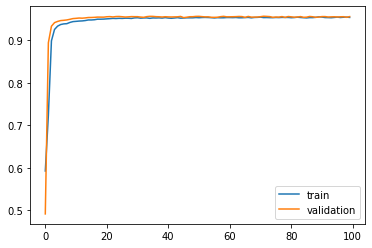

In [29]:
# Plot the accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "validation"])
plt.show()